In [35]:
import sys

import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

if '..' not in sys.path:
    sys.path.append('..')

from utils import tensor_to_plottable
from cnn import Net, train, test

# PreProcessing

In [36]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5), (0.5))]
)

batch_size = 512

train_set = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
test_set = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)
test_set, val_set = random_split(test_set, [len(test_set) - 5000, 5000])

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

classes = (
    "0 - zero",
    "1 - one",
    "2 - two",
    "3 - three",
    "4 - four",
    "5 - five",
    "6 - six",
    "7 - seven",
    "8 - eight",
    "9 - nine",
)

print(f'Train set size: {len(train_set)}')
print(f'Val set size: {len(val_set)}')
print(f'Test set size: {len(test_set)}')

Train set size: 60000
Val set size: 5000
Test set size: 5000


In [51]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0  # Escala de pixels para o intervalo [0, 1]
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)  # Codificar rótulos como vetores one-hot
y_test = to_categorical(y_test, 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [52]:
ann = tf.keras.models.Sequential()
ann.add(Flatten(input_shape=(28, 28)))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(Dropout(0.2))  # Dropout para regularização
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [53]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
history = ann.fit(X_train, y_train,  validation_split=0.2, batch_size = 10, epochs = 10, verbose=1)

Epoch 1/10
4800/4800 [==============================] - 6s 1ms/step - loss: 0.2249 - accuracy: 0.9319 - val_loss: 0.1270 - val_accuracy: 0.9609
Epoch 2/10
4800/4800 [==============================] - 6s 1ms/step - loss: 0.1021 - accuracy: 0.9688 - val_loss: 0.1123 - val_accuracy: 0.9668
Epoch 3/10
4800/4800 [==============================] - 6s 1ms/step - loss: 0.0730 - accuracy: 0.9772 - val_loss: 0.0872 - val_accuracy: 0.9754
Epoch 4/10
4800/4800 [==============================] - 6s 1ms/step - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.1023 - val_accuracy: 0.9734
Epoch 5/10
4800/4800 [==============================] - 6s 1ms/step - loss: 0.0462 - accuracy: 0.9848 - val_loss: 0.1038 - val_accuracy: 0.9731
Epoch 6/10
4800/4800 [==============================] - 7s 1ms/step - loss: 0.0377 - accuracy: 0.9876 - val_loss: 0.1070 - val_accuracy: 0.9734
Epoch 7/10
4800/4800 [==============================] - 6s 1ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.1054 - val_accuracy:

In [57]:
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)
y_test = tf.argmax(y_test, axis=1)

In [58]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020CFFCD85E0> (for post_execute):


KeyboardInterrupt: 

In [59]:
report = classification_report(y_test, y_pred)
print('Relatório de Classificação:\n', report)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     980.0
           1       0.00      0.00      0.00    1135.0
           2       0.00      0.00      0.00    1032.0
           3       0.00      0.00      0.00    1010.0
           4       0.00      0.00      0.00     982.0
           5       0.00      0.00      0.00     892.0
           6       0.00      0.00      0.00     958.0
           7       0.00      0.00      0.00    1028.0
           8       0.00      0.00      0.00     974.0
           9       0.00      0.00      0.00    1009.0
          38       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          41       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       0.0
          43       0.00      0.00      0.00       0.0
          46       0.00      0.00      0.00       0.0
          62       0.00      0.00      0.00       0.

C:\Users\sarah.andrade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah.andrade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah.andrade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah.andrade\Anaconda3\lib\si

In [ ]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.plot(history.history['loss'], label='Treinamento')
plt.xlabel('Época')
plt.ylabel('Erro Médio de Treinamento')
plt.title('Gráfico de Erro Médio de Treinamento')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Erro Médio de Validação')
plt.title('Gráfico de Erro Médio de Validação')
plt.legend()
plt.show()

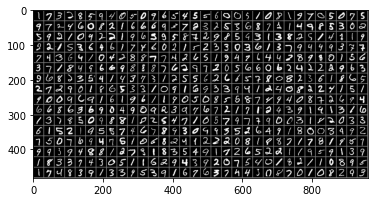

In [6]:
# get some random training images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# show images
plottable = tensor_to_plottable(torchvision.utils.make_grid(images, nrow=32))
plt.imshow(plottable)

# Train

In [7]:
net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
net.to(device)

Using device: cpu


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc3): Linear(in_features=3136, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)

In [8]:
n_epochs = 15
train_losses, train_accs, val_losses, val_accs = train(net, device, n_epochs, train_loader, val_loader)

torch.save(net.state_dict(), './checkpoint/net_mnist.pt')

Epoch 0/15 | train loss: 0.5751 | train acc: 0.8183: : 119it [00:44,  2.66it/s]                       
Epoch 0/15 | val loss: 0.1719 | val acc: 0.9482: : 11it [00:06,  1.68it/s]                      
Epoch 2/15:   0%|          | 0/118 [00:00<?, ?it/s]

Epoch 1/15 | train loss: 0.1488 | train acc: 0.9562: : 119it [00:47,  2.49it/s]                       
Epoch 1/15 | val loss: 0.1081 | val acc: 0.9696: : 11it [00:05,  2.09it/s]                      
Epoch 3/15:   0%|          | 0/118 [00:00<?, ?it/s]

Epoch 2/15 | train loss: 0.1055 | train acc: 0.9694: : 119it [00:44,  2.65it/s]                       
Epoch 2/15 | val loss: 0.0947 | val acc: 0.9729: : 11it [00:05,  2.02it/s]                      
Epoch 4/15:   0%|          | 0/118 [00:00<?, ?it/s]

Epoch 3/15 | train loss: 0.0872 | train acc: 0.9750: : 119it [00:51,  2.30it/s]                       
Epoch 3/15 | val loss: 0.0768 | val acc: 0.9780: : 11it [00:08,  1.30it/s]                      
Epoch 5/15:   0%|          | 0/118 [00:00<?, ?it/s]

Epoch 4/15 | train loss: 0.0734 | train acc: 0.9787: : 119it [00:45,  2.60it/s]                       
Epoch 5/15:   0%|          | 0/10 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
epochs = range(1, n_epochs + 1)

# Plotting losses
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, 'b', label='Training Accuracy')
plt.plot(epochs, val_accs, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Test

In [ ]:
net = Net()
net.load_state_dict(torch.load('./checkpoint/net_mnist.pt'))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

In [ ]:
ytrue, ypred = test(net, device, test_loader)

In [ ]:
ConfusionMatrixDisplay.from_predictions(ytrue, ypred, cmap=plt.cm.Blues)

In [ ]:
print(classification_report(ytrue, ypred, target_names=classes))

## Rede Neural Multi Camadas

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim=6))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = ann.fit(X_train, y_train,  validation_split=0.2, batch_size = 10, epochs = 100, verbose=0)

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)j